In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style("darkgrid")

In [2]:
import pandas as pd


data = pd.read_csv("data/Train.csv")
df = data.copy()

In [3]:
df.head() # type: ignore

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
df["Warehouse_block"].unique(), df['Mode_of_Shipment'].unique(), df['Product_importance'].unique(),\
    df['Gender'].unique()

(array(['D', 'F', 'A', 'B', 'C'], dtype=object),
 array(['Flight', 'Ship', 'Road'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object),
 array(['F', 'M'], dtype=object))

In [7]:
df.shape

(10999, 12)

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df['Prior_purchases'][df['Prior_purchases']>5].unique()

array([ 6,  7, 10,  8], dtype=int64)

In [10]:
df.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [11]:
new_name = {
    "Warehouse_block": "Warehouse Block",
    "Mode_of_Shipment": "Mode of Shipment",
    "Customer_care_calls": "Customer Care Calls",
    "Customer_rating": "Customer Rating",
    "Cost_of_the_Product": "Cost of the Product",
    "Prior_purchases": "Prior Purchases",
    "Product_importance": "Product Importance",
    "Discount_offered": "Discount Offered",
    "Weight_in_gms": "Weight in gms",
    "Reached.on.Time_Y.N": "Reached on Time"
}
df.rename(columns=new_name, inplace=True)

In [12]:
df['Gender'] = df['Gender'].str.replace("F", "Female").str.replace("M", "Male")

In [13]:
df["Reached on Time"] = df['Reached on Time'].astype(bool)

In [14]:
df.head()

,ID,Warehouse Block,Mode of Shipment,Customer Care Calls,Customer Rating,Cost of the Product,Prior Purchases,Product Importance,Gender,Discount Offered,Weight in gms,Reached on Time
0,1,D,Flight,4,2,177,3,low,Female,44,1233,True
1,2,F,Flight,4,5,216,2,low,Male,59,3088,True
2,3,A,Flight,2,2,183,4,low,Male,48,3374,True
3,4,B,Flight,3,3,176,4,medium,Male,10,1177,True
4,5,C,Flight,2,2,184,3,medium,Female,46,2484,True


In [15]:
mode_reached = df.groupby(["Mode of Shipment", "Reached on Time"]).size().unstack()
warehouse_reached = df.groupby(["Warehouse Block", "Reached on Time"]).size().unstack()
product_reached = df.groupby("Product Importance")["Reached on Time"].size().sort_values(ascending=False).reset_index()
gender_cost = df.groupby(["Gender", "Reached on Time"])["Cost of the Product"].mean().unstack()
on_time_df = df[df["Reached on Time"]]
prior_reached = on_time_df.groupby("Prior Purchases")["Customer Rating"].mean().reset_index()

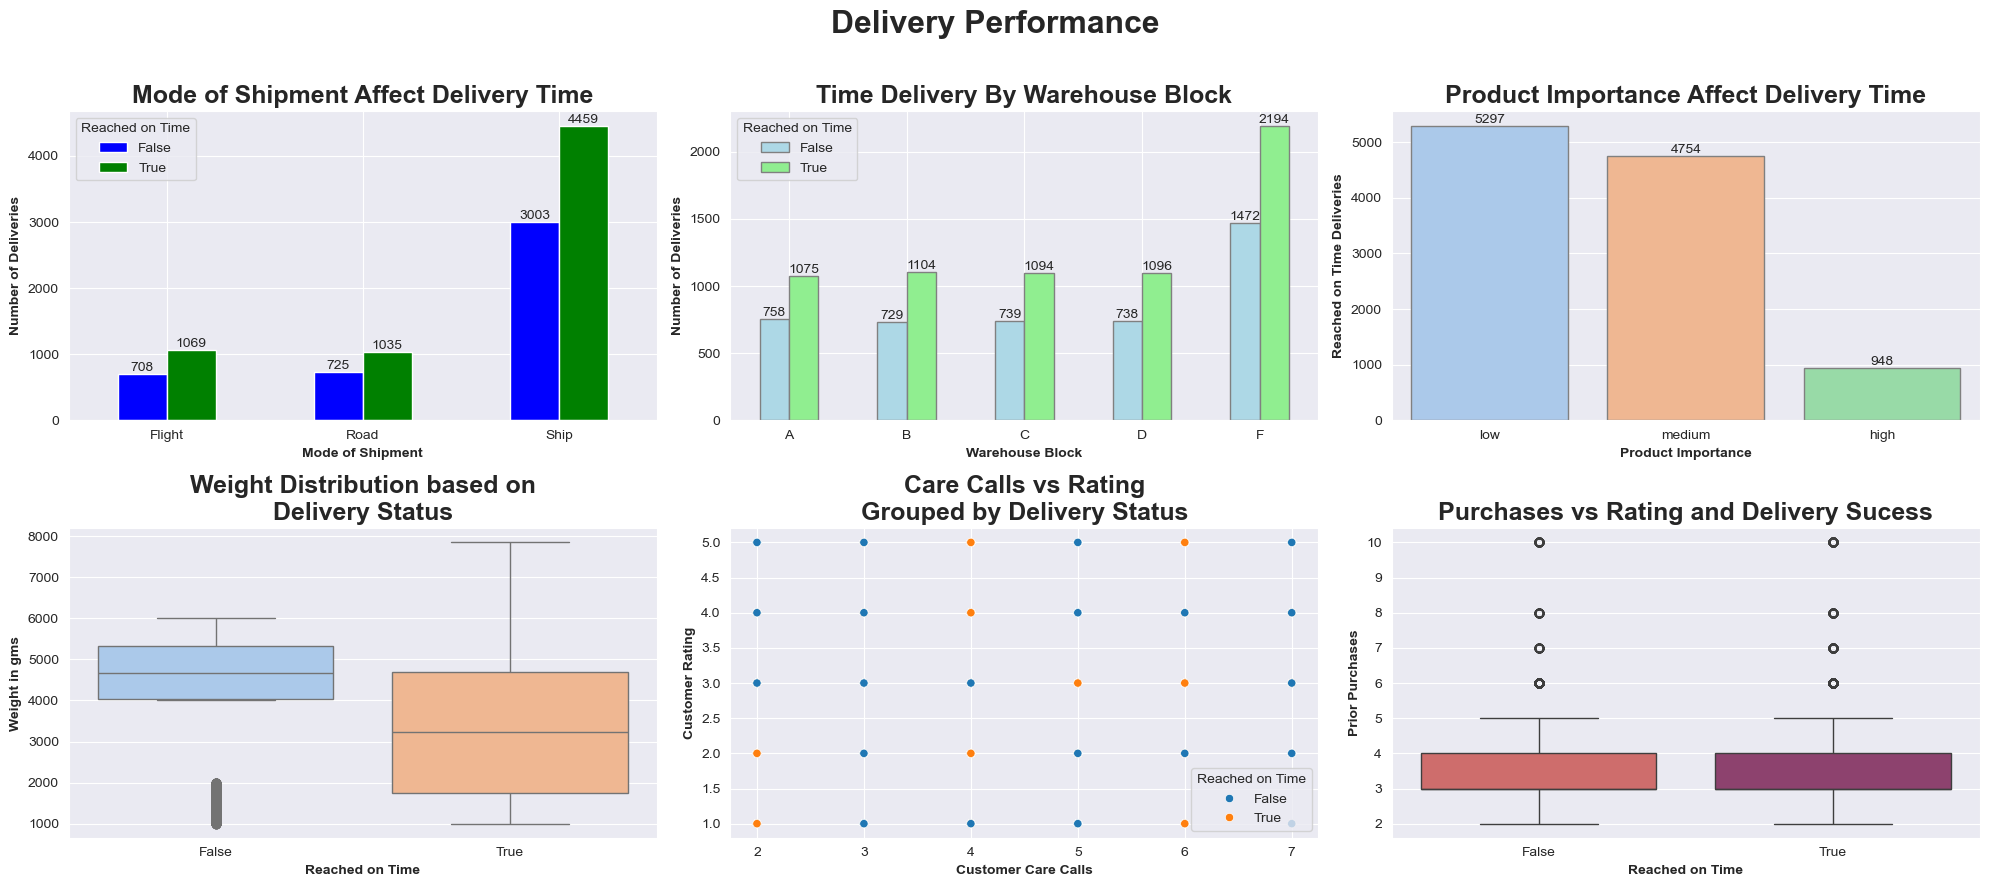

In [69]:
# Delivery Performance
fig, axis = plt.subplots(2, 3, figsize=(20, 9))

# ------------------------Mode of Shipment affect Delivery Time--------------------------------
mode_reached.plot(kind='bar', ax=axis[0, 0], color=["blue", "green"], edgecolor='white')
axis[0, 0].set_title("Mode of Shipment Affect Delivery Time", fontweight='bold', fontsize=18)
axis[0, 0].tick_params(axis='x', rotation=0)
axis[0, 0].set_xlabel("Mode of Shipment", fontweight='bold')
axis[0, 0].set_ylabel("Number of Deliveries", fontweight='bold')

for index in range(len(mode_reached)):
    try:
        axis[0, 0].bar_label(axis[0, 0].containers[index])
    except:
        pass


# ---------------------------Time Delivery By Warehouse block----------------------------------
warehouse_reached.plot(kind='bar', ax=axis[0, 1], color=["lightblue", "lightgreen"], edgecolor='grey')
axis[0, 1].set_title("Time Delivery By Warehouse Block", fontweight='bold', fontsize=18)
axis[0, 1].tick_params(axis='x', rotation=0)
axis[0, 1].set_xlabel("Warehouse Block", fontweight='bold')
axis[0, 1].set_ylabel("Number of Deliveries", fontweight='bold')

for index in range(len(warehouse_reached)):
    try:
        axis[0, 1].bar_label(axis[0, 1].containers[index])
    except:
        pass

# -----------------------Product Importance affect Delivery Time-------------------------------
sns.barplot(data=product_reached, 
            x="Product Importance", 
            y="Reached on Time", 
            ax=axis[0, 2], 
            hue="Product Importance", 
            palette="pastel", 
            edgecolor='grey')
axis[0, 2].set_title("Product Importance Affect Delivery Time", fontweight='bold', fontsize=18)
axis[0, 2].set_xlabel("Product Importance", fontweight='bold')
axis[0, 2].set_ylabel("Reached on Time Deliveries", fontweight='bold')

for index in range(len(product_reached)):
    axis[0, 2].bar_label(axis[0, 2].containers[index])

# --------------------Weight Distribution based on Delivery status-----------------------------
sns.boxplot(data=df, y="Weight in gms", x='Reached on Time', ax=axis[1, 0], hue="Reached on Time", palette='pastel', legend=False)
axis[1, 0].set_title("Weight Distribution based on\nDelivery Status", fontweight='bold', fontsize=18)
axis[1, 0].set_xlabel("Reached on Time", fontweight='bold')
axis[1, 0].set_ylabel("Weight in gms", fontweight='bold')

# -----------------Care Calls vs Rating, Grouped by Delivery status----------------------------
sns.scatterplot(data=df, x="Customer Care Calls", y="Customer Rating", hue="Reached on Time", ax=axis[1, 1])
axis[1, 1].set_title("Care Calls vs Rating\nGrouped by Delivery Status", fontweight='bold', fontsize=18)
axis[1, 1].set_xlabel("Customer Care Calls", fontweight='bold')
axis[1, 1].set_ylabel("Customer Rating", fontweight='bold')

# --------------------------------Purchases vs Rating and Delivery success---------------------
sns.boxplot(data=df, x='Reached on Time', y="Prior Purchases", ax=axis[1, 2], hue='Reached on Time', palette='flare', legend=False)
axis[1, 2].set_title("Purchases vs Rating and Delivery Sucess", fontweight='bold', fontsize=18)
axis[1, 2].set_xlabel("Reached on Time", fontweight='bold')
axis[1, 2].set_ylabel("Prior Purchases", fontweight='bold')

fig.suptitle("Delivery Performance\n", fontweight='bold', fontsize=23)
fig.tight_layout()
plt.show()

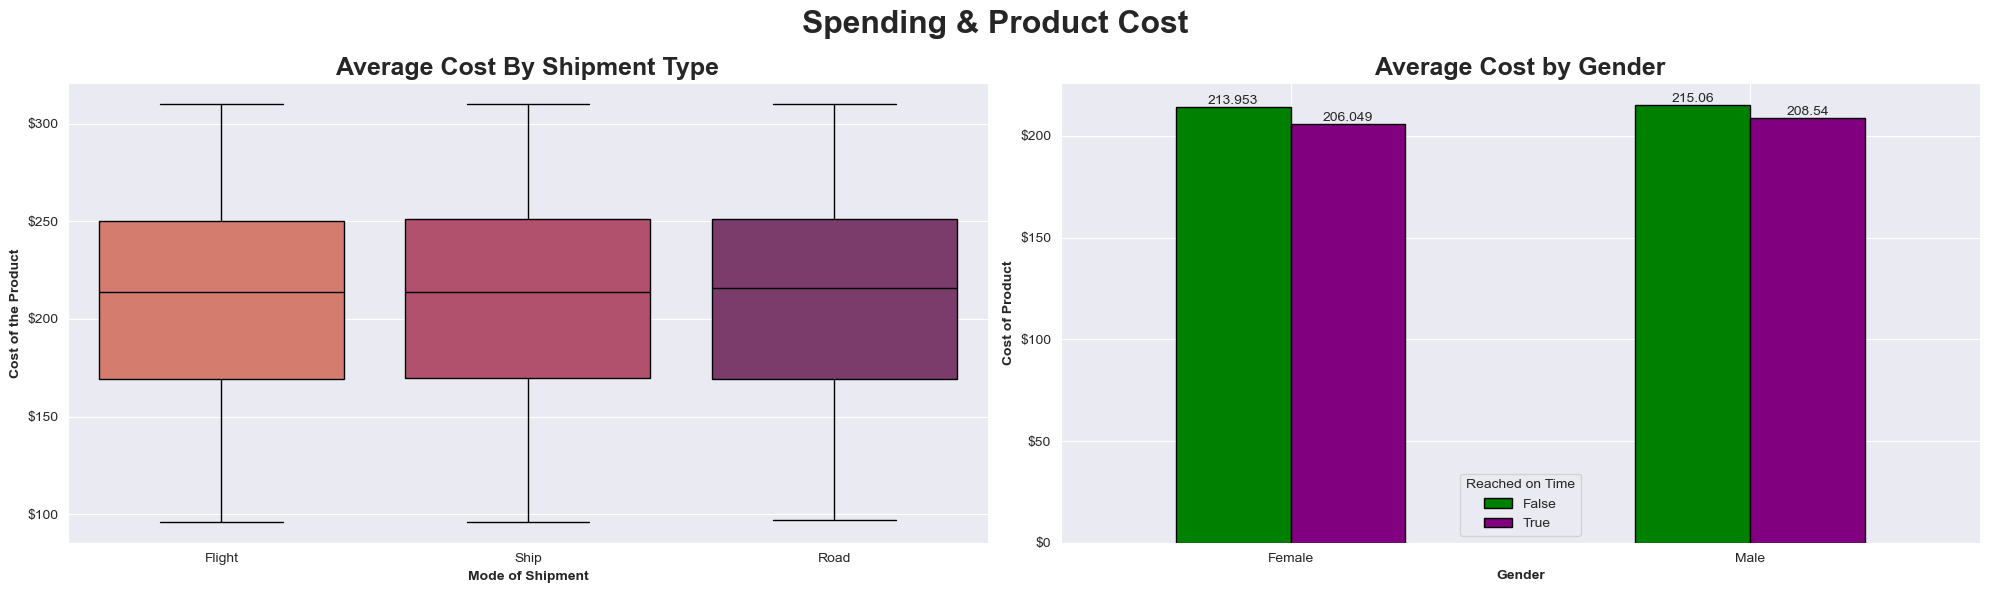

In [131]:
# Spending & Product Cost
fig, axis = plt.subplots(1, 2, figsize=(20, 6))

# -----------------------------Average Cost By Shipment Type--------------------------------------
sns.boxplot(data=df, x="Mode of Shipment", y="Cost of the Product", ax=axis[0], hue="Mode of Shipment", palette='flare', linecolor='black')
axis[0].set_title("Average Cost By Shipment Type", fontweight='bold', fontsize=18)
axis[0].set_xlabel("Mode of Shipment", fontweight='bold')
axis[0].set_ylabel("Cost of the Product", fontweight='bold')
axis[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# -------------------------------Average cost by Gender-------------------------------------------
gender_cost.plot(kind='bar', ax=axis[1], color=["green", "purple"], edgecolor='black')
axis[1].set_title("Average Cost by Gender", fontweight='bold', fontsize=18)
axis[1].set_xlabel("Gender", fontweight='bold')
axis[1].set_ylabel("Cost of Product", fontweight='bold')
axis[1].tick_params(axis="x", rotation=0)
axis[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

for index in range(len(gender_cost)):
    axis[1].bar_label(axis[1].containers[index])

fig.suptitle("Spending & Product Cost", fontweight='bold', fontsize=23)
fig.tight_layout()
plt.show()

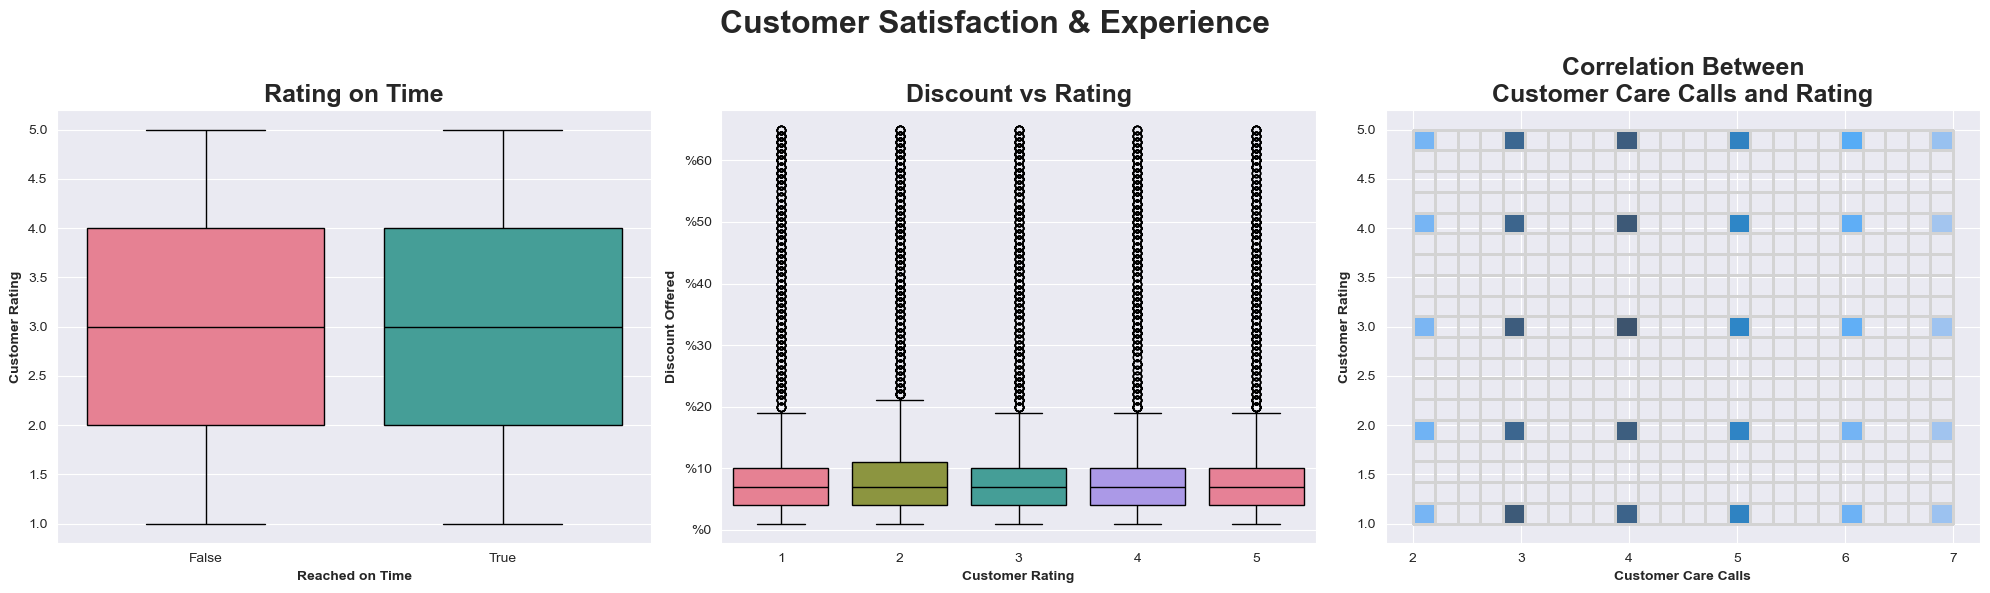

In [126]:
# Customer Satisfaction & Experience
fig, axis = plt.subplots(1, 3, figsize=(20, 6))

# -------------------------------------Rating distribution by Delivery status-----------------------------
sns.boxplot(data=df, 
            x="Reached on Time", 
            y="Customer Rating", 
            ax=axis[0], 
            hue='Reached on Time', 
            palette="husl",
            linecolor='black',
            legend=False)
axis[0].set_title("Rating on Time", fontweight='bold', fontsize=18)
axis[0].set_xlabel("Reached on Time", fontweight='bold')
axis[0].set_ylabel("Customer Rating", fontweight='bold')

# ------------------------------------------Discount vs rating--------------------------------------------
sns.boxplot(data=df, 
            x="Customer Rating", 
            y="Discount Offered", 
            ax=axis[1], 
            hue='Customer Rating', 
            palette='husl', 
            linecolor='black',
            legend=False)
axis[1].set_title("Discount vs Rating", fontweight='bold', fontsize=18)
axis[1].set_xlabel("Customer Rating", fontweight='bold')
axis[1].set_ylabel("Discount Offered", fontweight='bold')
axis[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("%{x:,.0f}"))

# -----------------------------Correlation Between Customer care calls and Rating-------------------------
sns.histplot(data=on_time_df, x="Customer Care Calls", y="Customer Rating", ax=axis[2], edgecolor="lightgrey")
axis[2].set_title("Correlation Between\nCustomer Care Calls and Rating", fontweight='bold', fontsize=18)
axis[2].set_xlabel("Customer Care Calls", fontweight='bold')
axis[2].set_ylabel("Customer Rating", fontweight='bold')

fig.suptitle("Customer Satisfaction & Experience", fontweight='bold', fontsize=23)
fig.tight_layout()
plt.show()

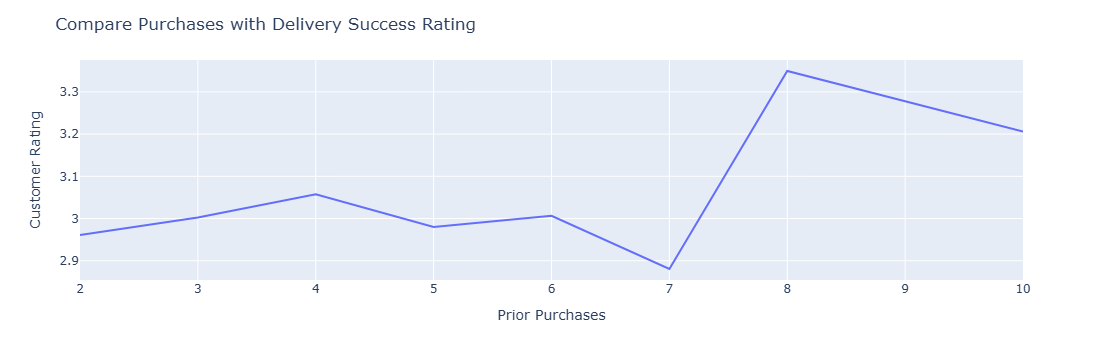

In [130]:
# Loyalty & Customer Behavior
# ---------------------------Compare Purchasses with delivery success or rating--------------------------
fig = px.line(data_frame=prior_reached, x='Prior Purchases', y='Customer Rating')
fig.update_layout(
    title_text="Compare Purchases with Delivery Success Rating"
)

fig.show()

# E-commerce Shipping Insights Report

## **Summary Insights (Storytelling)**

Imagine a bustling e-commerce network dispatching thousands of packages daily by **flight**, **road**, and **ship**. Across every shipping mode, the majority of orders consistently arrive on time — with **ships handling the lion’s share** of timely deliveries.

When we zoom into warehouse operations, **Warehouse Block A** leads in volume, but timely deliveries are robust across all warehouse blocks. Surprisingly, **product importance influences delivery punctuality** — low-importance items are delivered on time far more often than high-importance ones.

Weight plays its part: **heavier packages tend to be late**, while lighter ones reach customers more reliably. Interestingly, **customer care calls and ratings have minimal effect on timely deliveries**, suggesting that service quality is steady regardless of issues raised.

Customers spend about **$200–$250 per shipment**, and spend slightly more when deliveries arrive late, regardless of gender. Lastly, whether a customer buys once or ten times, their ratings and delivery experiences stay remarkably consistent.

In short: **On-time delivery is the norm, weight is a key disruptor, and spending trends stay stable — a healthy sign of operational reliability.**

---

## **Full Insights**

### **Delivery Performance**

- **Mode of Shipment**
  - **Flight:**
    - On Time: 1,069 deliveries
    - Late: 708 deliveries
  - **Road:**
    - On Time: 1,035 deliveries
    - Late: 725 deliveries
  - **Ship:**
    - On Time: 4,459 deliveries
    - Late: 3,003 deliveries

- **Delivery by Warehouse Block**
  - *All blocks see more on-time deliveries than late ones.*
    - **Block A:** On Time: 1,075 | Late: 758
    - **Block B:** On Time: 1,104 | Late: 729
    - **Block C:** On Time: 1,094 | Late: 739
    - **Block D:** On Time: 1,096 | Late: 738
    - **Block F:** On Time: 2,194 | Late: 1,472

- **Product Importance**
  - *Among deliveries that reached on time:*
    - Low importance: 5,297
    - Medium importance: 4,754
    - High importance: 948

- **Weight Distribution**
  - *Late deliveries:* Mean weight = 4,000–5,000 g; Q1 = 4,000–5,000 g; Q3 = 6,000 g; Outliers: 1,000–2,000 g
  - *On-time deliveries:* Mean weight = 3,000–4,000 g; Q1 = 1,000 g; Q3 = 7,000–8,000 g; No outliers

- **Care Calls vs Delivery**
  - Customer care call ratings of 3 and 7 are only observed for on-time deliveries; overall, care calls don’t influence delivery time.

- **Purchases vs Delivery Success**
  - No significant difference in prior purchases between on-time and late deliveries. Both average 3 prior purchases; Q1 = 2, Q3 = 5; with outliers at 6, 7, 8, and 10.

---

### **Spending & Product Cost**

- **Average Cost by Shipment Type**
  - Flight, Ship, and Road all average **$200–$250**
  - Q1: Below $100
  - Q3: Above $300

- **Average Cost by Gender**
  - *Female Customers:*
    - On Time: $206.04
    - Late: $213.95
  - *Male Customers:*
    - On Time: $208.64
    - Late: $215.06

---

### **Customer Satisfaction & Experience**

- **Customer Ratings**
  - No difference in customer ratings for on-time vs late deliveries:
    - Mean: 3.0 | Q1: 1.0 | Q3: 5.0

- **Correlation: Care Calls vs Ratings**
  - Strongest correlation at 3 and 4 care calls; weaker at 2, 6, and 7.

- **Purchases vs Customer Ratings**
  - Rating is stable across repeat purchases:
    - 3 purchases → Rating 3.00
    - 4 purchases → Rating 3.05
    - 5 purchases → Rating 2.97
    - 6 purchases → Rating 3.00
    - 7 purchases → Rating 2.88
    - 8 purchases → Rating 3.34
    - 10 purchases → Rating 3.20

---

## **Key Takeaways**

- **Shipping mode and warehouse block impact delivery speed, but on-time delivery is consistently strong overall.**
- **Heavier packages are more likely to be delayed — optimizing for weight could boost punctuality.**
- **Product importance correlates: lower importance equals more timely delivery.**
- **Customer care calls and customer ratings do not significantly influence delivery times — a sign of reliable service quality.**
- **Average spending stays consistent around $200–$250, regardless of shipment type or customer gender, but slightly increases with late deliveries.**
- **Customer satisfaction remains steady, no matter how many times they purchase or whether a delivery is late.**

---
